<a href="https://colab.research.google.com/github/SandeeeeeeeeepDey/useful_notebooks_created/blob/main/Layout_parser_Decrypted_engg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!cd $(python -c "import detectron2; print(detectron2.__path__[0])")
!pip install Pillow==8.4.0
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu118/torch2.0/index.html

In [32]:
image = cv2.imread("/content/mulyi.png")
image = image[..., ::-1]

datasets = {
    "HJDataset": {1:"Page Frame", 2:"Row", 3:"Title Region", 4:"Text Region", 5:"Title", 6:"Subtitle", 7:"Other"},
    "PubLayNet": {0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"},
    "PrimaLayout": {1:"TextRegion", 2:"ImageRegion", 3:"TableRegion", 4:"MathsRegion", 5:"SeparatorRegion", 6:"OtherRegion"},
    "NewspaperNavigator": {0: "Photograph", 1: "Illustration", 2: "Map", 3: "Comics/Cartoon", 4: "Editorial Cartoon", 5: "Headline", 6: "Advertisement"},
    "TableBank": {0: "Table"},
    "Math Formula Detection(MFD)": {1: "Equation"}
}
models_per_dataset = {
    'HJDataset': [
        {'model_name': 'faster_rcnn_R_50_FPN_3x', 'config_path': 'lp://HJDataset/faster_rcnn_R_50_FPN_3x/config'},
        {'model_name': 'mask_rcnn_R_50_FPN_3x', 'config_path': 'lp://HJDataset/mask_rcnn_R_50_FPN_3x/config'},
        {'model_name': 'retinanet_R_50_FPN_3x', 'config_path': 'lp://HJDataset/retinanet_R_50_FPN_3x/config'}
    ],
    'PubLayNet': [
        {'model_name': 'faster_rcnn_R_50_FPN_3x', 'config_path': 'lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config'},
        {'model_name': 'mask_rcnn_R_50_FPN_3x', 'config_path': 'lp://PubLayNet/mask_rcnn_R_50_FPN_3x/config'},
        {'model_name': 'mask_rcnn_X_101_32x8d_FPN_3x', 'config_path': 'lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config'}
    ],
    'PrimaLayout': [
        {'model_name': 'mask_rcnn_R_50_FPN_3x', 'config_path': 'lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config'}
    ],
    'NewspaperNavigator': [
        {'model_name': 'faster_rcnn_R_50_FPN_3x', 'config_path': 'lp://NewspaperNavigator/faster_rcnn_R_50_FPN_3x/config'}
    ],
    'TableBank': [
        {'model_name': 'faster_rcnn_R_50_FPN_3x', 'config_path': 'lp://TableBank/faster_rcnn_R_50_FPN_3x/config'},
        {'model_name': 'faster_rcnn_R_101_FPN_3x', 'config_path': 'lp://TableBank/faster_rcnn_R_101_FPN_3x/config'}
    ],
    'Math Formula Detection(MFD)': [
        {'model_name': 'faster_rcnn_R_50_FPN_3x', 'config_path': 'lp://MFD/faster_rcnn_R_50_FPN_3x/config'}
    ]
}



Dataset: HJDataset


  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


----------------------------Using model: faster_rcnn_R_50_FPN_3x


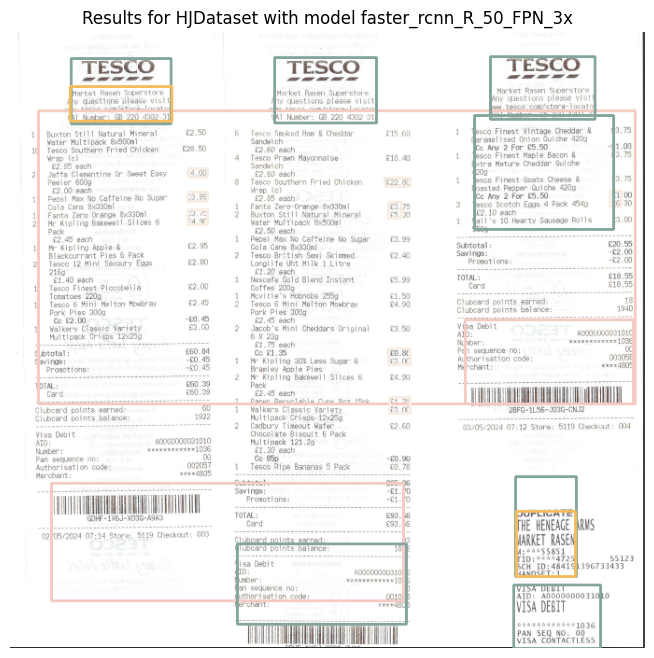

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


----------------------------Using model: mask_rcnn_R_50_FPN_3x


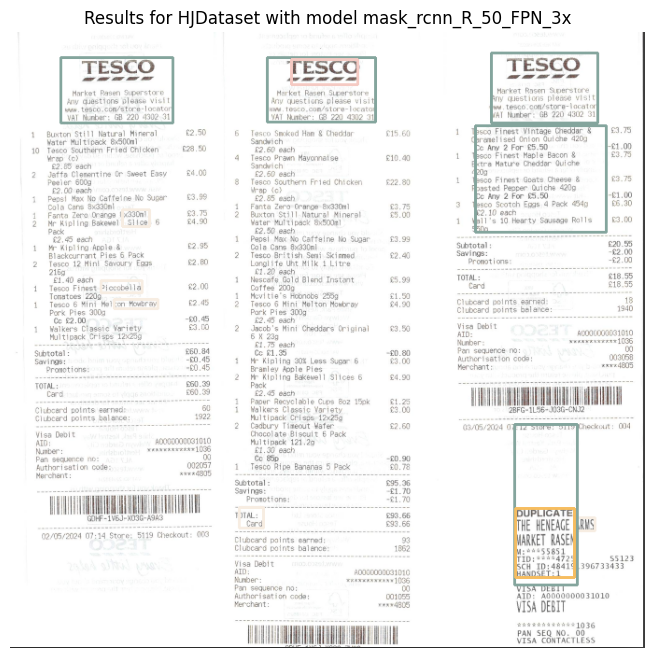

  anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


----------------------------Using model: retinanet_R_50_FPN_3x


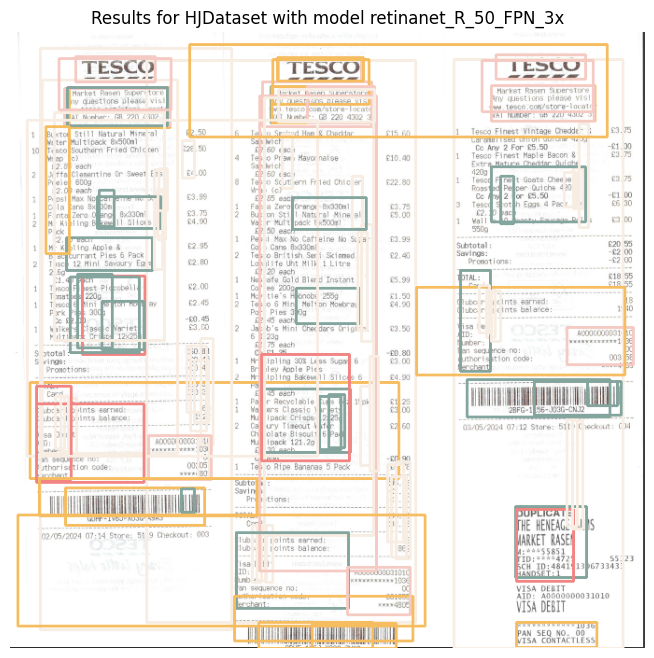

Dataset: PubLayNet


  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


----------------------------Using model: faster_rcnn_R_50_FPN_3x


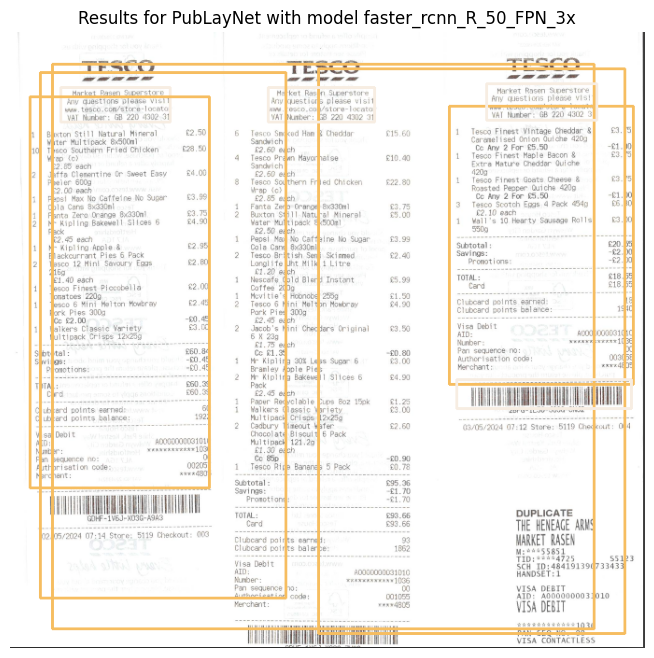

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


----------------------------Using model: mask_rcnn_R_50_FPN_3x


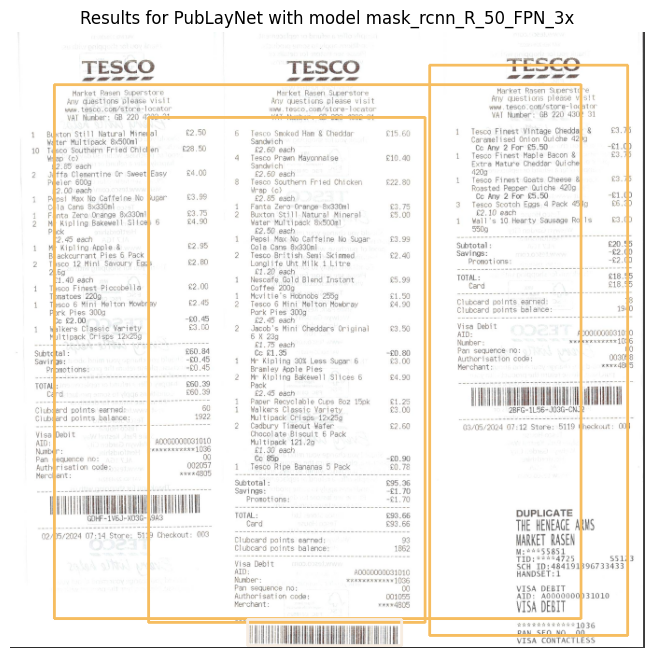

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


----------------------------Using model: mask_rcnn_X_101_32x8d_FPN_3x


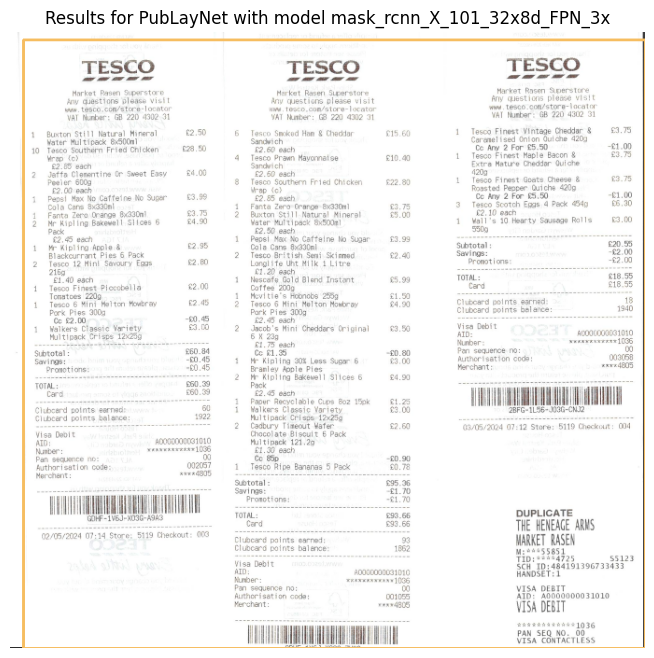

Dataset: PrimaLayout


  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


----------------------------Using model: mask_rcnn_R_50_FPN_3x


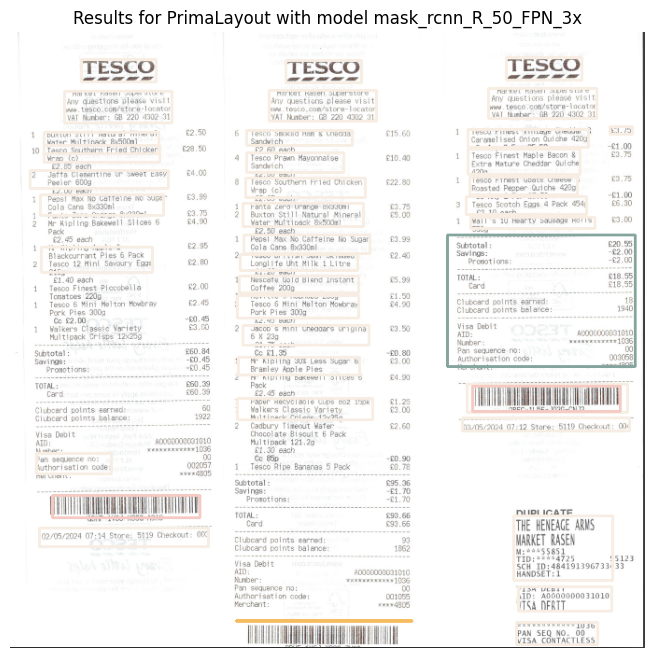

Dataset: NewspaperNavigator


  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


----------------------------Using model: faster_rcnn_R_50_FPN_3x


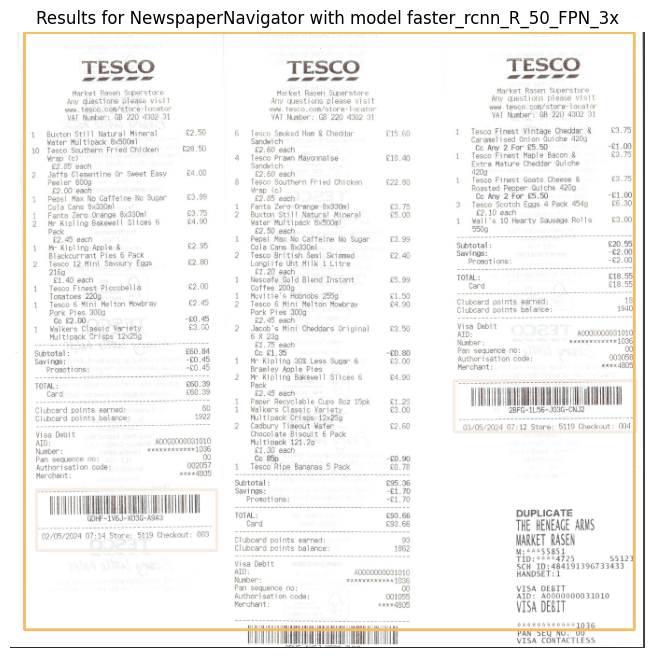

Dataset: TableBank


  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


----------------------------Using model: faster_rcnn_R_50_FPN_3x


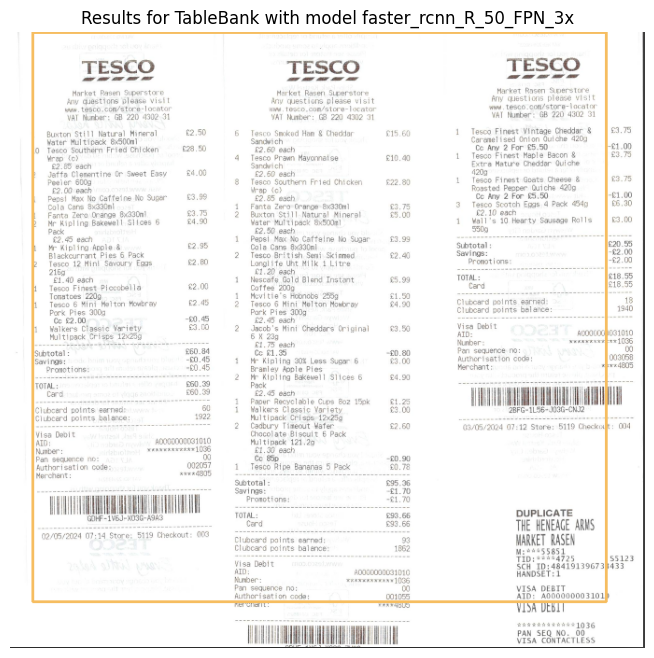

  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


----------------------------Using model: faster_rcnn_R_101_FPN_3x


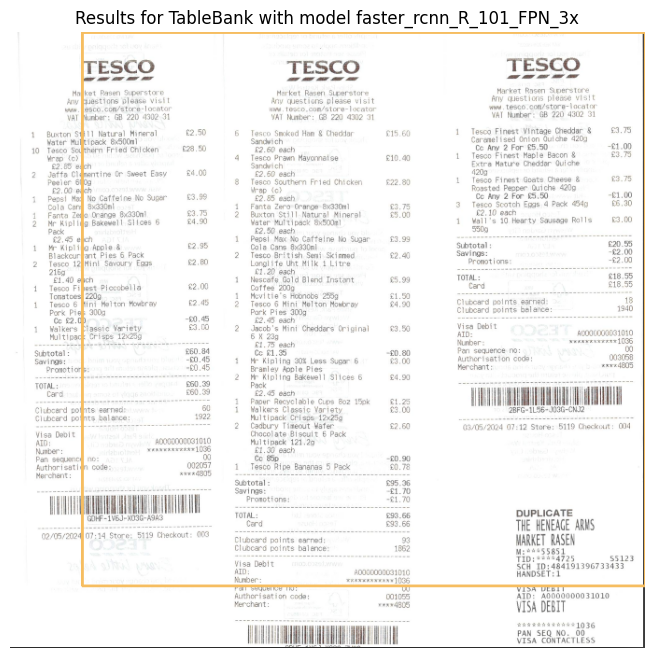

Dataset: Math Formula Detection(MFD)


  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


----------------------------Using model: faster_rcnn_R_50_FPN_3x


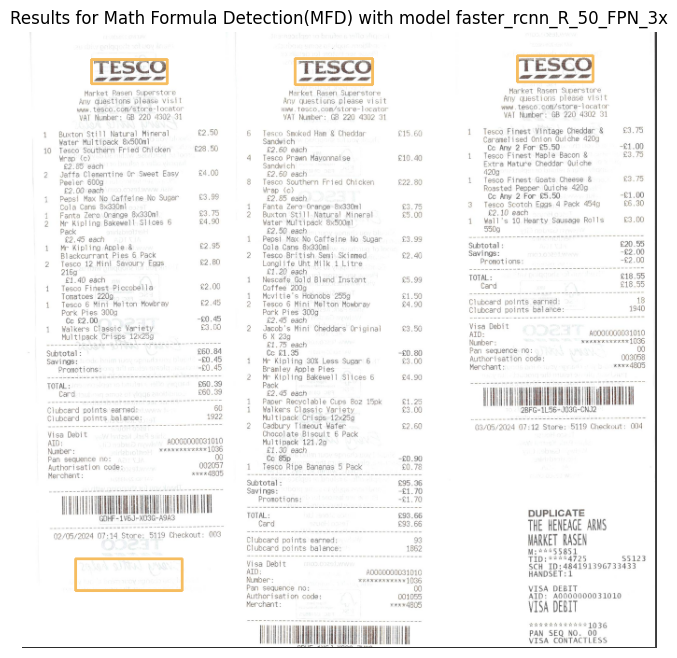

In [47]:
import matplotlib.pyplot as plt

for dataset_name, label_map in datasets.items():
    print(f"Dataset: {dataset_name}")
    for model_model_config_pair in models_per_dataset[dataset_name]:
        model_name = model_model_config_pair['model_name']
        model_config = model_model_config_pair['config_path']

        model = lp.Detectron2LayoutModel(
            model_config,
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.49],
            label_map=label_map
        )

        layout = model.detect(image)

        visualized_image = lp.draw_box(image, layout, box_width=3)
        print(f"----------------------------Using model: {model_name}")
        plt.figure(figsize=(12, 8))
        plt.imshow(visualized_image)
        plt.title(f"Results for {dataset_name} with model {model_name}")
        plt.axis("off")
        plt.show()
